## Importing Libraries


In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


## Load data and pre-process it

In [39]:
df = pd.read_csv("../data/network_traffic.csv")

X = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Isolation Forest

In [40]:
isf = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = isf.fit_predict(X_scaled)
df['anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

In [41]:
os.makedirs("../models", exist_ok=True)
joblib.dump(isf, "../models/isolation_forest.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

In [42]:
df.to_csv("../anomaly_results.csv", index=False)
print("✅ Model and scaler saved!")

✅ Model and scaler saved!


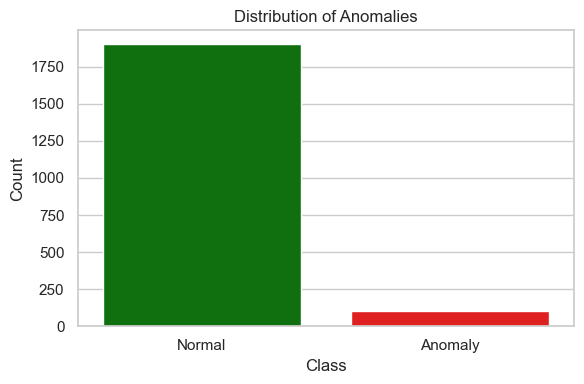

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x="anomaly", data=df, palette=["green", "red"])
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.title("Distribution of Anomalies")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

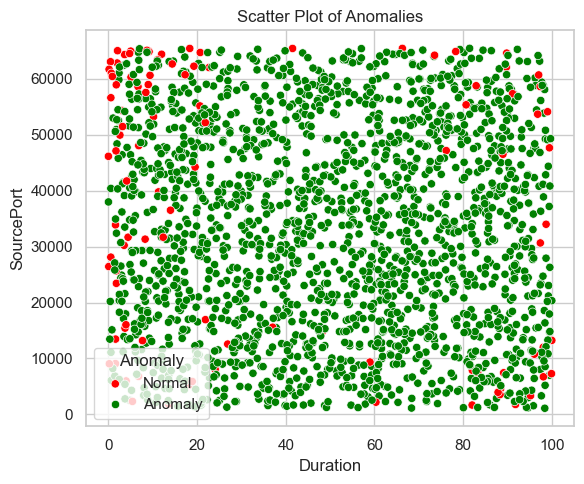

In [44]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) >= 2:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], hue="anomaly", palette=["green", "red"])
    plt.title("Scatter Plot of Anomalies")
    plt.legend(title="Anomaly", labels=["Normal", "Anomaly"])
    plt.tight_layout()
    plt.show()

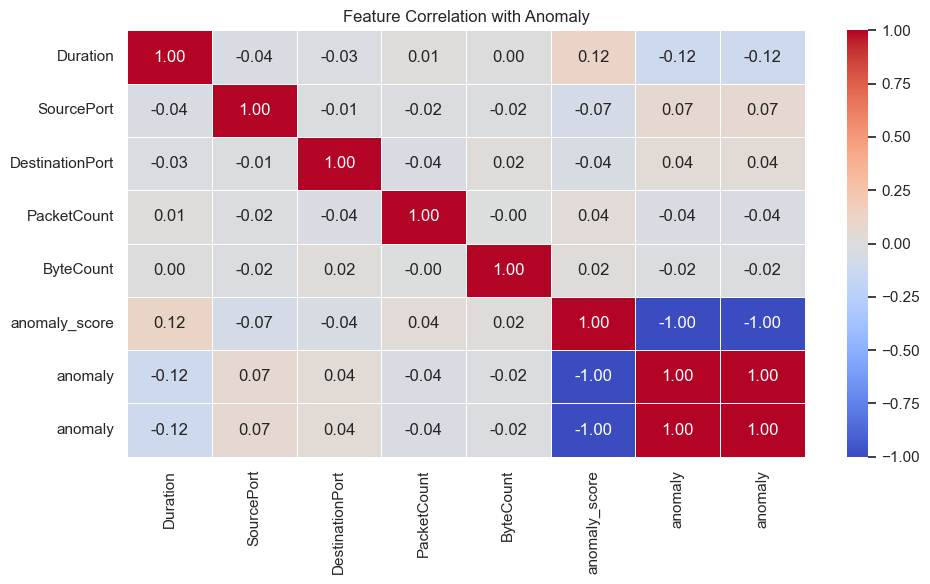

In [45]:
plt.figure(figsize=(10, 6))
corr = df[numeric_cols + ['anomaly']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Anomaly")
plt.tight_layout()
plt.show()

In [46]:
plt.savefig("../data/anomaly_distribution.png")

<Figure size 640x480 with 0 Axes>